# Jewerystore EDA and Price prediction
---
>  An epxloration of a medium sized jewelry online store purchase history from November 2018 to November 2020.


## Importing libs

In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pylab import *
from scipy import *
from pylab import rcParams
import statsmodels.formula.api as smf
%matplotlib inline

## Loading dataset

The full dataset is available as a python package: https://www.kaggle.com/mkechinov/ecommerce-purchase-history-from-jewelry-store

In [376]:
# load jewelry store dataset

jewelry = pd.read_csv('Data/jewelry.csv')

In [377]:
# inspect dataset

print(jewelry.shape)
print(jewelry.columns)
print(jewelry.dtypes)

(113302, 13)
Index(['event_time', 'order_id', 'product_id', 'quantity', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'gender', 'color',
       'metal', 'gem'],
      dtype='object')
event_time        object
order_id           int64
product_id         int64
quantity           int64
category_id      float64
category_code     object
brand            float64
price            float64
user_id          float64
gender            object
color             object
metal             object
gem               object
dtype: object


In [378]:
#staistics of the the numeric variables
jewelry.describe()

,order_id,product_id,quantity,category_id,brand,price,user_id
count,1.133020e+05,1.133020e+05,113302.000000,1.129050e+05,1.119360e+05,112905.000000,1.129050e+05
mean,2.200117e+18,1.854770e+18,1.000009,1.806637e+18,5.330749e+15,292.254944,1.512850e+18
std,1.410954e+17,1.910882e+17,0.002971,9.733465e+15,8.939869e+16,481.857658,2.250084e+16
min,1.923416e+18,1.313551e+18,1.000000,1.313678e+18,0.000000e+00,0.920000,1.313554e+18
25%,2.086874e+18,1.851564e+18,1.000000,1.806829e+18,0.000000e+00,110.580000,1.515916e+18
50%,2.201607e+18,1.956664e+18,1.000000,1.806829e+18,1.000000e+00,204.380000,1.515916e+18
75%,2.317472e+18,1.956664e+18,1.000000,1.806829e+18,1.000000e+00,346.530000,1.515916e+18
max,2.453171e+18,2.440041e+18,2.000000,1.806829e+18,1.550613e+18,34723.950000,1.555252e+18


In [379]:
#checking whats in the dataset
jewelry.head(5)

,event_time,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem
0,2018-11-29 16:30:45 UTC,1923415742179443254,1836250225916772582,1,1.806829e+18,jewelry.pendant,0.0,67.78,1.515916e+18,NaN,red,gold,diamond
1,2018-11-29 16:52:07 UTC,1923426489303302817,1836015460420681761,1,1.806829e+18,jewelry.pendant,0.0,32.63,1.515916e+18,NaN,red,gold,NaN
2,2018-11-29 17:58:37 UTC,1923459963229831173,1806829194936582544,1,1.806829e+18,jewelry.ring,1.0,75.21,1.515916e+18,NaN,red,gold,amethyst
3,2018-11-29 20:25:52 UTC,1923534078074684181,1835566854668550661,1,1.806829e+18,jewelry.earring,0.0,131.37,1.515916e+18,f,red,gold,NaN
4,2018-11-29 20:30:01 UTC,1923536169069445939,1836568752905257618,1,1.806829e+18,jewelry.bracelet,0.0,102.60,1.515916e+18,f,red,gold,NaN


In [380]:
# unique number users
len(jewelry.user_id.unique())

45195

In [381]:
# unique number of brands
len(jewelry.brand.unique())

89

In [382]:
# unique number of gems
len(jewelry.gem.unique())

33

In [383]:
# unique gems
jewelry.gem.unique()

array(['diamond', nan, 'amethyst', 'topaz', 'fianit', 'garnet', 'pearl',
       'mix', 'amber', 'sapphire', 'ruby', 'turquoise', 'emerald',
       'quartz_smoky', 'chrysolite', 'nanocrystal', 'quartz', 'citrine',
       'agate', 'corundum', 'corundum_synthetic', 'sitall',
       'emerald_geothermal', 'chrysoprase', 'rhodolite', 'coral',
       'sapphire_geothermal', 'onyx', 'nacre', 'spinel', 'malachite',
       'tourmaline', 'garnet_synthetic'], dtype=object)

In [384]:
#counting number of each gems
jewelry.gem.value_counts()

diamond                34804
fianit                 17880
topaz                   7879
pearl                   4203
garnet                  3419
sapphire                2260
amethyst                2194
mix                     1277
emerald                 1009
quartz                   662
amber                    267
ruby                     252
chrysolite               147
quartz_smoky             143
rhodolite                120
citrine                  112
nanocrystal               94
sitall                    79
turquoise                 66
corundum_synthetic        59
agate                     37
spinel                    26
tourmaline                23
nacre                     23
emerald_geothermal        19
onyx                      16
chrysoprase               11
coral                      6
sapphire_geothermal        3
corundum                   3
malachite                  1
garnet_synthetic           1
Name: gem, dtype: int64

In [385]:
# counting number of unique metals
jewelry.metal.value_counts()

gold        111301
silver        1547
platinum         3
Name: metal, dtype: int64

In [386]:
#unique metals
jewelry.metal.unique()

array(['gold', 'silver', nan, 'platinum'], dtype=object)

In [387]:
# unique genders
jewelry.gender.unique()

array([nan, 'f', 'm'], dtype=object)

In [388]:
#counting number of each genders
jewelry.gender.value_counts()

f    61664
m      559
Name: gender, dtype: int64

In [389]:

jewelry.category_code.unique()

array(['jewelry.pendant', 'jewelry.ring', 'jewelry.earring',
       'jewelry.bracelet', 'electronics.clocks', nan, 'jewelry.stud',
       'jewelry.brooch', 'jewelry.necklace', 'jewelry.souvenir', '697.58',
       '230.12', '202.36', '140.51', '639.00', '1098.03', '321.78',
       '1128.62', '81.27', '34.25', '582.16', '227.37', '234.22',
       '131.82', '150.55', '2123.15', '109.45', '26.03', '49.22',
       '472.47', '205.38', '2061.51', '313.36', '2746.44', '2.73',
       '51.08', '1636.85', '335.59', '108.33', '752.01', '231.12',
       '152.33', '184.22', '1095.75', '76.97', '3054.73', '212.19',
       '184.90', '560.92', '2.88', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', '287.53', '412.30', '102.10',
       '595.75', '469.56', '427.07', '53.62', '77.53', '1469.18',
       '355.27', '184.89', '154.66', '300.58', '83.73', '271.19',
       '3294.21', '278.04', '3626.26', '126.03', '143.15', '283.52',
       '306.12', '328.73', '114.38', '89.04', '3022

In [16]:
jewelry = jewelry[jewelry.category_code != 'electronics.clocks']


In [17]:
jewelry.category_code.value_counts()

jewelry.ring        39269
jewelry.earring     36038
jewelry.pendant     16456
jewelry.bracelet     7163
jewelry.necklace     2473
                    ...  
149.04                  1
153.97                  1
102.10                  1
108.53                  1
262.88                  1
Name: category_code, Length: 201, dtype: int64

## Cleaning data
1. Cutomized float formatting of columns with scientific notation
2. Identifying and droping null values
4. Inssspecting if there are duplicate rows
3. Setting the correct Date datatype

1. Cutomized float formatting of columns with scientific notation

In [26]:
#suppress the scientific notation of the floats, while retaining the float format.
pd.options.display.float_format = '{:.0f}'.format

In [31]:
#loading the dataet to see if the scientific notation on colums has been supressed
jewelry.head()

,event_time,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem
0,2018-11-29 16:30:45 UTC,1923415742179443254,1836250225916772582,1,1806829201915904256,jewelry.pendant,0,68,1515915625233196800,NaN,red,gold,diamond
1,2018-11-29 16:52:07 UTC,1923426489303302817,1836015460420681761,1,1806829201915904256,jewelry.pendant,0,33,1515915625233029376,NaN,red,gold,NaN
2,2018-11-29 17:58:37 UTC,1923459963229831173,1806829194936582544,1,1806829201882349824,jewelry.ring,1,75,1515915625233228544,NaN,red,gold,amethyst
3,2018-11-29 20:25:52 UTC,1923534078074684181,1835566854668550661,1,1806829201890738432,jewelry.earring,0,131,1515915625233289216,f,red,gold,NaN
4,2018-11-29 20:30:01 UTC,1923536169069445939,1836568752905257618,1,1806829201865572608,jewelry.bracelet,0,103,1515915625117578240,f,red,gold,NaN


The scientific notation of the floats has been replace with actual numbers for the id columns

2. Replacing null value cells with an identiffier


In [18]:
#inpecting null values
jewelry.isnull().sum()

event_time           0
order_id             0
product_id           0
quantity             0
category_id        397
category_code     9628
brand             1366
price              397
user_id            397
gender           51009
color             3007
metal              431
gem              36059
dtype: int64

In [19]:
len(jewelry)

113056

In [38]:
113302 - 36207

77095

In [55]:
#creating a dataframe for jeweries with categry_code as NA
cate = jewelry.loc[(jewelry.category_code.isna())]
                                                    
cate.head()

,event_time,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem
14,2018-11-30 09:21:52 UTC,1923924647787626920,1806829191514031042,1,1806829201848795392,NaN,1,2730,1550612949079425536,NaN,red,gold,mix
33,2018-11-30 14:37:33 UTC,1924083542879371615,1806829193686680056,1,1806829201848795392,NaN,1,256,1515915625233573376,f,white,gold,NaN
58,2018-12-01 11:20:38 UTC,1924709199648915985,1806829191841185940,1,1806829201848795392,NaN,1,156,1515915625230266368,NaN,white,gold,NaN
74,2018-12-01 17:34:20 UTC,1924897291626349410,1806829191522419657,1,1806829201848795392,NaN,1,187,1515915625206167040,NaN,white,gold,NaN
75,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1806829201848795392,NaN,1,212,1515915625071970048,NaN,yellow,gold,NaN


In [78]:
cate.shape

(9628, 13)

In [61]:
#
cate.category_id.value_counts()


1806829201848795392    9014
1806829201991401728     551
1806829201957847296      43
1806829202117230848      13
1313677632054755840       5
1313677632121864704       1
1806829202066899200       1
Name: category_id, dtype: int64

In [56]:
len(cate.category_id.value_counts())

7

In [90]:
cat_prod = jewelry.loc[(jewelry.category_id.notnull()) & (jewelry.category_code.notnull())] 
cat_prod.head()

,event_time,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem
0,2018-11-29 16:30:45 UTC,1923415742179443254,1836250225916772582,1,1806829201915904256,jewelry.pendant,0,68,1515915625233196800,NaN,red,gold,diamond
1,2018-11-29 16:52:07 UTC,1923426489303302817,1836015460420681761,1,1806829201915904256,jewelry.pendant,0,33,1515915625233029376,NaN,red,gold,NaN
2,2018-11-29 17:58:37 UTC,1923459963229831173,1806829194936582544,1,1806829201882349824,jewelry.ring,1,75,1515915625233228544,NaN,red,gold,amethyst
3,2018-11-29 20:25:52 UTC,1923534078074684181,1835566854668550661,1,1806829201890738432,jewelry.earring,0,131,1515915625233289216,f,red,gold,NaN
4,2018-11-29 20:30:01 UTC,1923536169069445939,1836568752905257618,1,1806829201865572608,jewelry.bracelet,0,103,1515915625117578240,f,red,gold,NaN


In [ ]:
nyc_joined = fp_left_joined.loc[(fp_left_joined['origin'].isin (['JFK','LGA'])) & (fp_left_joined['year'] == 2013) ]

In [91]:
len(cat_prod)

103277

In [113]:
cat_test = jewelry.loc[(jewelry.category_id.isin ([1806829201848795392]))] 

cat_test.category_code.notnull().any()

False

In [116]:
cat_test2 = jewelry.loc[(jewelry.category_id.isnull())] 


cat_test2


,event_time,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem
2055,2019-01-19 16:50:29 UTC,1960389233814274426,1916614406133776515,1,NaN,697.58,1515915625236289280,NaN,NaN,NaN,NaN,NaN,NaN
3296,2019-01-26 05:51:21 UTC,1965130913738130034,1937825427510789079,1,NaN,230.12,1550612949079425536,NaN,NaN,NaN,NaN,NaN,NaN
5462,2019-02-05 08:39:25 UTC,1972463258694582403,1536903766496772737,1,NaN,202.36,1325156214706799360,NaN,NaN,NaN,NaN,NaN,NaN
7224,2019-02-14 08:19:11 UTC,1978976060741517517,1515966222725010479,1,NaN,140.51,1515915625260675328,NaN,NaN,NaN,NaN,NaN,NaN
7225,2019-02-14 08:19:11 UTC,1978976060741517517,1515966222725010480,1,NaN,639.00,1515915625260675328,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111489,2020-11-17 08:36:25 UTC,2444290753170506336,1515966223500167543,1,NaN,318.71,1515915625349119744,NaN,NaN,NaN,NaN,NaN,NaN
111490,2020-11-17 08:36:25 UTC,2444290753170506336,1515966223500167543,1,NaN,318.71,1515915625349119744,NaN,NaN,NaN,NaN,NaN,NaN
111968,2020-11-20 17:20:32 UTC,2446728873597993079,1515966223558740733,1,NaN,0.14,1515915625541766144,NaN,NaN,NaN,NaN,NaN,NaN
112073,2020-11-21 13:47:57 UTC,2447346655536611380,1515966223559252325,1,NaN,440.96,1515915625056977664,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
cat_test2['category_code'].value_counts()

154.66     10
596.48     10
150.55      9
176.30      8
1447.68     8
           ..
412.30      1
2746.44     1
355.27      1
210.21      1
149.04      1
Name: category_code, Length: 193, dtype: int64

In [124]:
cat_test2['category_code'].unique()

array(['697.58', '230.12', '202.36', '140.51', '639.00', '1098.03',
       '321.78', '1128.62', '81.27', '34.25', '582.16', '227.37',
       '234.22', '131.82', '150.55', '2123.15', '109.45', '26.03',
       '49.22', '472.47', '205.38', '2061.51', '313.36', '2746.44',
       '2.73', '51.08', '1636.85', '335.59', '108.33', '752.01', '231.12',
       '152.33', '184.22', '1095.75', '76.97', '3054.73', '212.19',
       '184.90', '560.92', '2.88', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', '287.53', '412.30', '102.10',
       '595.75', '469.56', '427.07', '53.62', '77.53', '1469.18',
       '355.27', '184.89', '154.66', '300.58', '83.73', '271.19',
       '3294.21', '278.04', '3626.26', '126.03', '143.15', '283.52',
       '306.12', '328.73', '114.38', '89.04', '3022.56', '273.25',
       '300.16', '8.22', '164.36', '124.88', '114.93', '89.73', '171.23',
       '136.93', '19.04', '158.77', '611.63', '190.27', '2.30', '187.10',
       '151.92', '1845.89', '87.

In [20]:
jewelry.gem.value_counts()

diamond                34804
fianit                 17782
topaz                   7879
pearl                   4203
garnet                  3419
sapphire                2260
amethyst                2194
mix                     1277
emerald                 1009
quartz                   662
amber                    267
ruby                     252
chrysolite               147
quartz_smoky             143
rhodolite                120
citrine                  112
nanocrystal               94
sitall                    79
turquoise                 66
corundum_synthetic        59
agate                     37
spinel                    26
tourmaline                23
nacre                     23
emerald_geothermal        19
onyx                      16
chrysoprase               11
coral                      6
sapphire_geothermal        3
corundum                   3
malachite                  1
garnet_synthetic           1
Name: gem, dtype: int64

In [127]:
jewelry.dropna()

,event_time,order_id,product_id,quantity,category_id,category_code,brand,price,user_id,gender,color,metal,gem
6,2018-11-30 04:44:41 UTC,1923785141226832396,1806829188997448495,1,1806829201890738432,jewelry.earring,0,281,1515915625229118208,f,white,gold,topaz
8,2018-11-30 05:57:31 UTC,1923821802102980777,1807570270689427678,1,1806829201890738432,jewelry.earring,0,103,1515915625227051520,f,yellow,gold,garnet
10,2018-11-30 07:51:11 UTC,1923879009750352262,1835768939246781396,1,1806829201882349824,jewelry.ring,5,75,1515915625200819712,f,red,gold,pearl
11,2018-11-30 07:53:37 UTC,1923880230888407455,1806829197990035478,1,1806829201865572608,jewelry.bracelet,5,411,1515915625047730176,f,red,gold,amethyst
12,2018-11-30 08:09:26 UTC,1923888191576736319,1807251125804466651,1,1806829201890738432,jewelry.earring,5,551,1515915625040805120,f,red,gold,diamond
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113293,2020-11-29 14:11:20 UTC,2453156631333044279,1956663846382863135,1,1806829201882349824,jewelry.ring,1,635,1515915625545791744,f,red,gold,diamond
113294,2020-11-29 14:11:20 UTC,2453156631333044279,1956663846382863135,1,1806829201882349824,jewelry.ring,1,635,1515915625545791744,f,red,gold,diamond
113295,2020-11-29 14:21:39 UTC,2453161821616472226,2362688282686390554,1,1806829201890738432,jewelry.earring,0,216,1515915625546158592,f,red,gold,garnet
113299,2020-11-29 14:32:30 UTC,2453167283086819594,1927585748282770109,1,1806829201915904256,jewelry.pendant,0,93,1515915625546154752,f,red,gold,topaz


In [23]:
gender = jewelry.gender.value_counts()
gender

f    61538
m      509
Name: gender, dtype: int64

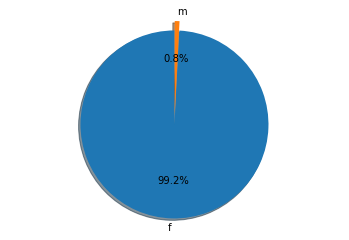

In [24]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = gender.index
values = gender.values
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [25]:
jewelry.isna().sum()

event_time           0
order_id             0
product_id           0
quantity             0
category_id        397
category_code     9628
brand             1366
price              397
user_id            397
gender           51009
color             3007
metal              431
gem              36059
dtype: int64

In [26]:
jewelry.drop(['gender'], axis=1, inplace= True)

In [28]:
jewelry.dropna(axis=0, inplace= True)

In [29]:
jewelry.quantity.unique()

array([1], dtype=int64)

In [30]:
jewelry.drop(['quantity'], axis=1, inplace= True)

In [31]:
jewelry.isna().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
color            0
metal            0
gem              0
dtype: int64

In [32]:
jewelry.shape

(74445, 11)

In [33]:
jewelry.dtypes

event_time        object
order_id           int64
product_id         int64
category_id      float64
category_code     object
brand            float64
price            float64
user_id          float64
color             object
metal             object
gem               object
dtype: object

In [34]:
jewelry['event_time'].head()

0    2018-11-29 16:30:45 UTC
2    2018-11-29 17:58:37 UTC
5    2018-11-29 23:27:58 UTC
6    2018-11-30 04:44:41 UTC
7    2018-11-30 05:57:23 UTC
Name: event_time, dtype: object

In [35]:
#Converting Date column from object to datetime
jewelry['event_time'] = pd.to_datetime(jewelry['event_time'], format='%Y-%m-%d %H:%M:%S %Z')


In [41]:
jewelry['event_time'].dtypes

datetime64[ns, UTC]

In [42]:
#Category with the most order

jewelry.category_code.value_counts()

ring        28589
earring     28436
pendant     11185
bracelet     3633
necklace     1888
brooch        714
Name: category_code, dtype: int64

In [38]:
jewelry['category_code'] = jewelry['category_code'].str[8:]
jewelry.category_code.unique()

array(['pendant', 'ring', 'earring', 'bracelet', 'brooch', 'necklace'],
      dtype=object)

In [191]:
jewelry.brand.value_counts()

0    34293
1    32356
5     7786
2       10
Name: brand, dtype: int64

In [43]:
print(jewelry.shape)
print(jewelry.dtypes)

(74445, 11)
event_time       datetime64[ns, UTC]
order_id                       int64
product_id                     int64
category_id                  float64
category_code                 object
brand                        float64
price                        float64
user_id                      float64
color                         object
metal                         object
gem                           object
dtype: object


In [227]:
jewelry.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,color,metal,gem
0,2018-11-29 16:30:45+00:00,1923415742179443254,1836250225916772582,1806829201915904256,pendant,0,68,1515915625233196800,red,gold,diamond
2,2018-11-29 17:58:37+00:00,1923459963229831173,1806829194936582544,1806829201882349824,ring,1,75,1515915625233228544,red,gold,amethyst
5,2018-11-29 23:27:58+00:00,1923625730730623830,1836918640855745365,1806829201882349824,ring,1,74,1515915625157322496,white,gold,amethyst
6,2018-11-30 04:44:41+00:00,1923785141226832396,1806829188997448495,1806829201890738432,earring,0,281,1515915625229118208,white,gold,topaz
7,2018-11-30 05:57:23+00:00,1923821728249675940,1313677630628692275,1806829201882349824,ring,0,127,1515915625233394432,red,gold,fianit


EDA - CAtegory

<AxesSubplot:>

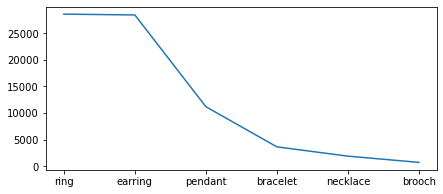

In [217]:
fig, ax = plt.subplots(figsize=(7,3))

jewelry.category_code.value_counts().plot(ax=ax)

In [190]:
jewelry.category_code.value_counts()

ring        28589
earring     28436
pendant     11185
bracelet     3633
necklace     1888
brooch        714
Name: category_code, dtype: int64

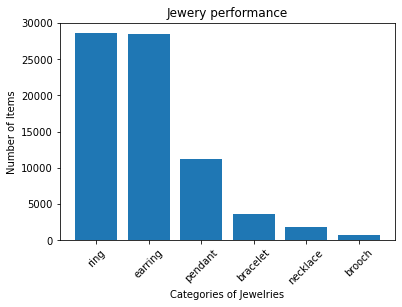

In [289]:
plt.figure()
plt.bar(jewelry['category_code'].value_counts().index, jewelry['category_code'].value_counts().values)
plt.xlabel('Categories of Jewelries')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.title('Jewery performance')
plt.show()

In [214]:
jewelry[['category_code', 'price']].groupby(['category_code']).sum().sort_values('price', ascending=False)


,price
category_code,
earring,10098469
ring,9542143
pendant,1535735
bracelet,1519602
necklace,677101
brooch,226105


In [ ]:
jewelry.category_code.value_counts()

<AxesSubplot:xlabel='event_time'>

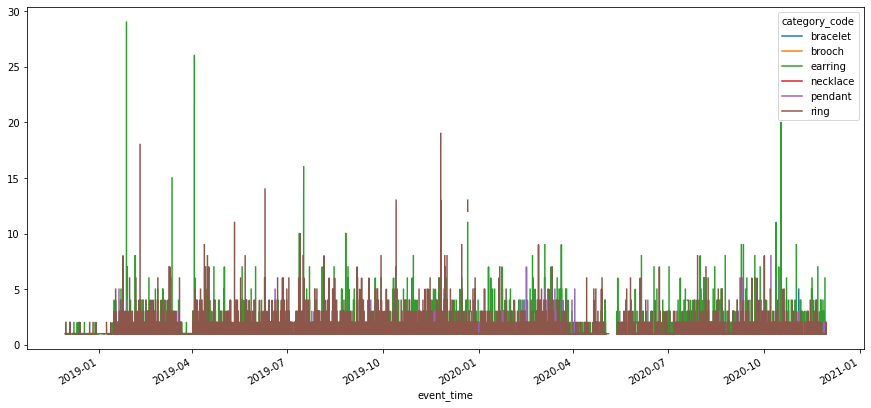

In [200]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
jewelry.groupby(['event_time','category_code']).count()['order_id'].unstack().plot(ax=ax)

In [291]:
jewelry_18 = jewelry.loc[(jewelry['event_time'] >= '2018') & (jewelry['event_time'] < '2019')]

pd.concat([jewelry_18['event_time'].head(1), jewelry_18['event_time'].tail(1)])


0     2018-11-29 16:30:45+00:00
961   2018-12-31 21:53:10+00:00
Name: event_time, dtype: datetime64[ns, UTC]

In [281]:
jewelry_18.order_id.value_counts().sum()

608

In [290]:
jewelry_19 = jewelry.loc[(jewelry['event_time'] >= '2019') & (jewelry['event_time'] < '2020')]

pd.concat([jewelry_19['event_time'].head(1), jewelry_19['event_time'].tail(1)])


964     2019-01-01 17:06:17+00:00
60870   2019-12-31 23:39:31+00:00
Name: event_time, dtype: datetime64[ns, UTC]

In [283]:
jewelry_19.order_id.value_counts().sum()

40901

In [292]:
jewelry_20 = jewelry.loc[(jewelry['event_time'] >= '2020') & (jewelry['event_time'] < '2021')]

pd.concat([jewelry_20['event_time'].head(1), jewelry_20['event_time'].tail(1)])


60874    2020-01-01 07:03:59+00:00
113300   2020-11-29 14:36:52+00:00
Name: event_time, dtype: datetime64[ns, UTC]

In [294]:
print(jewelry_18.order_id.value_counts().sum())
print(jewelry_19.order_id.value_counts().sum())
print(jewelry_20.order_id.value_counts().sum())

608
40901
32936


In [295]:
print(jewelry_20.order_id.value_counts().sum() + jewelry_19.order_id.value_counts().sum() + jewelry_18.order_id.value_counts().sum())
print(jewelry.order_id.value_counts().sum())

74445
74445


In [309]:
jewelry_18.groupby(jewelry_18['event_time'].dt.strftime('%B'))['price'].sum().sort_values( ascending=False)


event_time
December   164439
November     9793
Name: price, dtype: float64

In [308]:
jewelry_19.groupby(jewelry_19['event_time'].dt.strftime('%B'))['price'].sum().sort_values( ascending=False)


event_time
December    2063863
November    1949552
October     1258666
July        1097134
August      1092283
February     949058
June         906660
March        841162
April        820202
January      771729
May          768260
September    762250
Name: price, dtype: float64

In [311]:
jewelry_20.groupby(jewelry_20['event_time'].dt.strftime('%B'))['price'].sum().sort_values(ascending = False)


event_time
February    1267414
August      1215312
March       1210674
January     1147607
September   1048379
October      946210
July         845584
November     829451
June         638200
April        562178
May          433094
Name: price, dtype: float64

In [ ]:
jewelry.groupby(jewelry['event_time'].dt.strftime('%B'))['price'].sum().sort_values(ascending = False)


In [318]:
dg = jewelry.groupby(pd.Grouper(key='event_time', freq='1Y'))['price'].sum().sort_values(ascending = False)

dg



event_time
2019-12-31 00:00:00+00:00   13280820
2020-12-31 00:00:00+00:00   10144103
2018-12-31 00:00:00+00:00     174232
Name: price, dtype: float64

In [319]:
jewelry.groupby(jewelry['event_time'].dt.strftime('%Y'))['price'].sum().sort_values(ascending = False)


event_time
2019   13280820
2020   10144103
2018     174232
Name: price, dtype: float64

In [321]:
jewelry.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,color,metal,gem
0,2018-11-29 16:30:45+00:00,1923415742179443254,1836250225916772582,1806829201915904256,pendant,0,68,1515915625233196800,red,gold,diamond
2,2018-11-29 17:58:37+00:00,1923459963229831173,1806829194936582544,1806829201882349824,ring,1,75,1515915625233228544,red,gold,amethyst
5,2018-11-29 23:27:58+00:00,1923625730730623830,1836918640855745365,1806829201882349824,ring,1,74,1515915625157322496,white,gold,amethyst
6,2018-11-30 04:44:41+00:00,1923785141226832396,1806829188997448495,1806829201890738432,earring,0,281,1515915625229118208,white,gold,topaz
7,2018-11-30 05:57:23+00:00,1923821728249675940,1313677630628692275,1806829201882349824,ring,0,127,1515915625233394432,red,gold,fianit


In [143]:
product = jewelry[['category_code','brand','price','color','metal','gem']].copy()

product.head()

,category_code,brand,price,color,metal,gem
0,pendant,0.0,67.78,red,gold,diamond
2,ring,1.0,75.21,red,gold,amethyst
5,ring,1.0,73.93,white,gold,amethyst
6,earring,0.0,280.68,white,gold,topaz
7,ring,0.0,126.99,red,gold,fianit


In [144]:
product.shape

(74445, 6)

In [145]:
print(product.category_code.value_counts())
print(product.color.value_counts())
print(product.metal.value_counts())
print(product.gem.value_counts())

ring        28589
earring     28436
pendant     11185
bracelet     3633
necklace     1888
brooch        714
Name: category_code, dtype: int64
red       56147
white     15529
yellow     2769
Name: color, dtype: int64
gold    74445
Name: metal, dtype: int64
diamond                33671
fianit                 16925
topaz                   7820
pearl                   4178
garnet                  3408
sapphire                2214
amethyst                2165
mix                      985
emerald                  981
quartz                   662
amber                    264
ruby                     244
chrysolite               147
quartz_smoky             143
rhodolite                120
citrine                  112
nanocrystal               94
sitall                    79
corundum_synthetic        59
turquoise                 59
agate                     28
tourmaline                23
emerald_geothermal        19
nacre                     18
chrysoprase               10
spinel             

In [146]:
product.drop(['metal'], axis=1, inplace= True)

In [147]:
product.head()

,category_code,brand,price,color,gem
0,pendant,0.0,67.78,red,diamond
2,ring,1.0,75.21,red,amethyst
5,ring,1.0,73.93,white,amethyst
6,earring,0.0,280.68,white,topaz
7,ring,0.0,126.99,red,fianit


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()  #instantiate the Label Encoder
product['color'] = le.fit_transform(product['color'])
product['']

In [148]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

X = pd.get_dummies(product.loc[:, product.columns != 'price'])
y = product['price']


In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [150]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #instantiating the model

In [151]:
model

LinearRegression()

In [152]:
model.fit(X_train, y_train)

LinearRegression()

In [153]:
y_pred = model.predict(X_test)

In [154]:
model.score(X_test, y_test)

-5.4311929998866874e+19

In [155]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :1.7781306349847545e+25
MAE is :111209083333.97559
r2 is :-5.4311929998866874e+19


Model 2

In [178]:
product_2 = product[['category_code','brand','price','gem']].copy()

product_2.head()

,category_code,brand,price,gem
0,pendant,0.0,67.78,diamond
2,ring,1.0,75.21,amethyst
5,ring,1.0,73.93,amethyst
6,earring,0.0,280.68,topaz
7,ring,0.0,126.99,fianit


In [179]:
X = pd.get_dummies(product_2.loc[:, product_2.columns != 'price'])
y = product_2['price']


In [180]:
X.head()

,brand,category_code_bracelet,category_code_brooch,category_code_earring,category_code_necklace,category_code_pendant,category_code_ring,gem_agate,gem_amber,gem_amethyst,gem_chrysolite,gem_chrysoprase,gem_citrine,gem_coral,gem_corundum,gem_corundum_synthetic,gem_diamond,gem_emerald,gem_emerald_geothermal,gem_fianit,gem_garnet,gem_garnet_synthetic,gem_malachite,gem_mix,gem_nacre,gem_nanocrystal,gem_onyx,gem_pearl,gem_quartz,gem_quartz_smoky,gem_rhodolite,gem_ruby,gem_sapphire,gem_sapphire_geothermal,gem_sitall,gem_spinel,gem_topaz,gem_tourmaline,gem_turquoise
0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [170]:
X.brand.unique()

array([0., 1., 5., 2.])

In [181]:
X.shape

(74445, 39)

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [183]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() #instantiating the model

In [184]:
model

LinearRegression()

In [186]:
model.fit(X_train, y_train)

LinearRegression()

In [187]:
y_pred = model.predict(X_test)

In [188]:
model.score(X_test, y_test)

-1.2111705229760108e+18

In [189]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :3.965278735517377e+23
MAE is :14166743772.153152
r2 is :-1.2111705229760108e+18


Model 3

In [196]:
product_3 = product_2[['category_code','brand','price']].copy()

product_3.head()

,category_code,brand,price
0,pendant,0.0,67.78
2,ring,1.0,75.21
5,ring,1.0,73.93
6,earring,0.0,280.68
7,ring,0.0,126.99


In [197]:
X = pd.get_dummies(product_3.loc[:, product_3.columns != 'price'])
y = product_3['price']

In [198]:
X.head()

,brand,category_code_bracelet,category_code_brooch,category_code_earring,category_code_necklace,category_code_pendant,category_code_ring
0,0.0,0,0,0,0,1,0
2,1.0,0,0,0,0,0,1
5,1.0,0,0,0,0,0,1
6,0.0,0,0,1,0,0,0
7,0.0,0,0,0,0,0,1


In [199]:
X.shape

(74445, 7)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [201]:
model = LinearRegression() #instantiating the model

In [202]:
model

LinearRegression()

In [203]:
model.fit(X_train, y_train)

LinearRegression()

In [204]:
y_pred = model.predict(X_test)

In [205]:
model.score(X_test, y_test)

0.017695949614608852

In [206]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :321598.7583015947
MAE is :200.2948672677816
r2 is :0.017695949614608852


Model 4

In [211]:
product_4 = product_3[['category_code','price']].copy()

product_4.head()

,category_code,price
0,pendant,67.78
2,ring,75.21
5,ring,73.93
6,earring,280.68
7,ring,126.99


In [212]:
X = pd.get_dummies(product_4.loc[:, product_4.columns != 'price'])
y = product_4['price']

In [213]:
X.head()

,category_code_bracelet,category_code_brooch,category_code_earring,category_code_necklace,category_code_pendant,category_code_ring
0,0,0,0,0,1,0
2,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,1,0,0,0
7,0,0,0,0,0,1


In [214]:
X.shape

(74445, 6)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [216]:
model = LinearRegression() #instantiating the model

In [217]:
model

LinearRegression()

In [218]:
model.fit(X_train, y_train)

LinearRegression()

In [219]:
y_pred = model.predict(X_test)

In [220]:
model.score(X_test, y_test)

0.01757866341098069

Model 5

In [222]:
product_5 = product_3[['brand','price']].copy()

product_5.head()

,brand,price
0,0.0,67.78
2,1.0,75.21
5,1.0,73.93
6,0.0,280.68
7,0.0,126.99


In [225]:
X = pd.get_dummies(product_5.loc[:, product_5.columns != 'price'])
y = product_5['price']

In [226]:
X.head()

,brand
0,0.0
2,1.0
5,1.0
6,0.0
7,0.0


In [227]:
X.shape

(74445, 1)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [229]:
model = LinearRegression() #instantiating the model

In [230]:
model

LinearRegression()

In [231]:
model.fit(X_train, y_train)

LinearRegression()

In [232]:
y_pred = model.predict(X_test)

In [233]:
model.score(X_test, y_test)

0.00012906892148856208

In [234]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :327350.01934538584
MAE is :210.67627857547498
r2 is :0.00012906892148856208


Model 6

In [257]:
product_6 = jewelry[['category_code','brand','price','color','gem']].copy()

product_6.head()

,category_code,brand,price,color,gem
0,pendant,0.0,67.78,red,diamond
2,ring,1.0,75.21,red,amethyst
5,ring,1.0,73.93,white,amethyst
6,earring,0.0,280.68,white,topaz
7,ring,0.0,126.99,red,fianit


In [258]:
product_6.drop_duplicates(keep=False,inplace=True)

In [259]:
product_6.shape

(1398, 5)

In [260]:
X = pd.get_dummies(product_6.loc[:, product_6.columns != 'price'])
y = product_6['price']

In [261]:
X.head()

,brand,category_code_bracelet,category_code_brooch,category_code_earring,category_code_necklace,category_code_pendant,category_code_ring,color_red,color_white,color_yellow,gem_agate,gem_amber,gem_amethyst,gem_chrysolite,gem_chrysoprase,gem_citrine,gem_coral,gem_corundum,gem_diamond,gem_emerald,gem_emerald_geothermal,gem_fianit,gem_garnet,gem_garnet_synthetic,gem_malachite,gem_mix,gem_nacre,gem_nanocrystal,gem_onyx,gem_pearl,gem_quartz,gem_quartz_smoky,gem_rhodolite,gem_ruby,gem_sapphire,gem_sapphire_geothermal,gem_sitall,gem_topaz,gem_turquoise
0,0.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [262]:
X.shape

(1398, 39)

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [264]:
model = LinearRegression() #instantiating the model

In [265]:
model

LinearRegression()

In [266]:
model.fit(X_train, y_train)

LinearRegression()

In [267]:
y_pred = model.predict(X_test)

In [268]:
model.score(X_test, y_test)

0.16759995309624975

In [269]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :768493.7965852997
MAE is :423.46979760370004
r2 is :0.16759995309624975


Model 7

In [270]:
product_7 = jewelry[['category_code','brand','price','gem']].copy()

product_7.head()

,category_code,brand,price,gem
0,pendant,0.0,67.78,diamond
2,ring,1.0,75.21,amethyst
5,ring,1.0,73.93,amethyst
6,earring,0.0,280.68,topaz
7,ring,0.0,126.99,fianit


In [272]:
product_7.drop_duplicates(keep=False,inplace=True)

In [273]:
product_7.shape

(1317, 4)

In [274]:
X = pd.get_dummies(product_7.loc[:, product_7.columns != 'price'])
y = product_7['price']

In [275]:
X.head()

,brand,category_code_bracelet,category_code_brooch,category_code_earring,category_code_necklace,category_code_pendant,category_code_ring,gem_agate,gem_amber,gem_amethyst,gem_chrysolite,gem_chrysoprase,gem_citrine,gem_coral,gem_corundum,gem_diamond,gem_emerald,gem_emerald_geothermal,gem_fianit,gem_garnet,gem_garnet_synthetic,gem_malachite,gem_mix,gem_nacre,gem_nanocrystal,gem_onyx,gem_pearl,gem_quartz,gem_quartz_smoky,gem_rhodolite,gem_ruby,gem_sapphire,gem_sapphire_geothermal,gem_sitall,gem_topaz,gem_turquoise
0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [276]:
X.shape

(1317, 36)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [278]:
model = LinearRegression() #instantiating the model

In [279]:
model

LinearRegression()

In [280]:
model.fit(X_train, y_train)

LinearRegression()

In [281]:
y_pred = model.predict(X_test)

In [282]:
model.score(X_test, y_test)

0.16515126120375545

In [283]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :733124.5167277094
MAE is :433.75571321971194
r2 is :0.16515126120375545


Model 8

In [352]:
product_8 = jewelry[['brand','price','gem']].copy()

product_8.head()

,brand,price,gem
0,0.0,67.78,diamond
2,1.0,75.21,amethyst
5,1.0,73.93,amethyst
6,0.0,280.68,topaz
7,0.0,126.99,fianit


In [353]:
product_8.drop_duplicates(keep=False,inplace=True)

In [354]:
product_8.shape

(1092, 3)

In [355]:
X = pd.get_dummies(product_8.loc[:, product_8.columns != 'price'])
y = product_8['price']

In [357]:
X.head()

,brand,gem_agate,gem_amber,gem_amethyst,gem_chrysolite,gem_chrysoprase,gem_citrine,gem_coral,gem_corundum,gem_diamond,gem_emerald,gem_emerald_geothermal,gem_fianit,gem_garnet,gem_garnet_synthetic,gem_malachite,gem_mix,gem_nacre,gem_nanocrystal,gem_onyx,gem_pearl,gem_quartz,gem_quartz_smoky,gem_rhodolite,gem_ruby,gem_sapphire,gem_sapphire_geothermal,gem_sitall,gem_topaz,gem_turquoise
0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [358]:
X.shape

(1092, 30)

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [360]:
model = LinearRegression() #instantiating the model

In [361]:
model

LinearRegression()

In [362]:
model.fit(X_train, y_train)

LinearRegression()

In [363]:
y_pred = model.predict(X_test)

In [364]:
model.score(X_test, y_test)

0.18475617633285635

In [365]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE is :{mse}")
print(f"MAE is :{mae}")
print(f"r2 is :{r2}")

MSE is :814649.9319179676
MAE is :474.5174848521103
r2 is :0.18475617633285635
